# Find chessboard in image

In [5]:
import pathlib
import cv2
import matplotlib.pyplot as plt
import numpy as np

# Crop and square chessboard

In [8]:
current_dir = pathlib.Path.cwd()
ROOT_DIR = current_dir.parent
REAL_DATASET_NAME = "real_chess_dataset"
REAL_DATASET_DIR = ROOT_DIR / "data" / REAL_DATASET_NAME

#VIDEO_ID = "w26XT8gQDCE"
VIDEO_ID = "rrPfmSWlAPM"
MOVE_NUMBER = 30
DATASET_VIDEO_DIR = REAL_DATASET_DIR / VIDEO_ID
GT_DIR = DATASET_VIDEO_DIR / "gt"
IRL_DIR = DATASET_VIDEO_DIR / "irl"

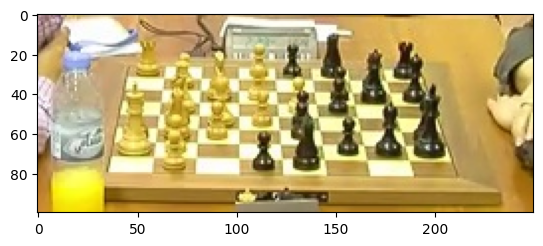

In [9]:
irl_img_path = IRL_DIR / f"{VIDEO_ID}_{MOVE_NUMBER:04}.jpg"

irl_img = cv2.imread(str(irl_img_path))
irl_img_rgb = cv2.cvtColor(irl_img, cv2.COLOR_BGR2RGB)
irl_n = irl_img_rgb / 255.0

plt.imshow(irl_n)
plt.show()

In [23]:
# Create a list to store the points
clicked_points = []

# Define the mouse callback function
def select_points(event, x, y, flags, params):
    global clicked_points
    if event == cv2.EVENT_LBUTTONDOWN:
        # Add the clicked point to the list
        clicked_points.append([x, y])
        # Draw a circle on the image to show where you've clicked
        cv2.circle(image_for_selection, (x, y), 5, (0, 255, 0), -1)
        print(f"Point {len(clicked_points)} selected: ({x}, {y})")

# Make a copy of the image to draw on, so the original isn't changed
image_for_selection = irl_img.copy()
clone = image_for_selection.copy()

# Create a window and set the mouse callback function
cv2.namedWindow("Select Corners")
cv2.setMouseCallback("Select Corners", select_points)

print("Please select the 4 corners of the chessboard: top-left, top-right, bottom-right, bottom-left.")
print("Press 'r' to reset, 'q' to quit.")

while True:
    # Display the image
    cv2.imshow("Select Corners", image_for_selection)
    key = cv2.waitKey(1) & 0xFF

    # If 'r' is pressed, reset the points
    if key == ord("r"):
        image_for_selection = clone.copy()
        clicked_points = []
        print("Points reset.")

    # If 'q' is pressed, break the loop
    elif key == ord("q"):
        break

# Close all OpenCV windows
cv2.destroyAllWindows()

# Now, you can use the collected points for the perspective transform
if len(clicked_points) == 4:
    src_pts = np.float32(clicked_points)
    print("\nSource points selected and ready for transformation.")
else:
    print("\nWarning: 4 points were not selected. The 'src_pts' variable may not be correct.")


Please select the 4 corners of the chessboard: top-left, top-right, bottom-right, bottom-left.
Press 'r' to reset, 'q' to quit.
Point 1 selected: (46, 26)
Point 2 selected: (192, 26)
Point 3 selected: (212, 82)
Point 4 selected: (35, 79)

Source points selected and ready for transformation.


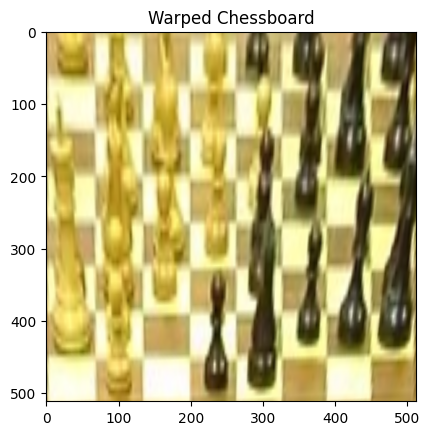

In [10]:
import numpy as np

# 1. Manually define the corners of the chessboard from the image.
#    You can find these coordinates by hovering your mouse over the corners
#    in the matplotlib window from the previous cell.
#    The order is important: top-left, top-right, bottom-right, bottom-left.
#    Replace these placeholder values with your actual coordinates.
# src_pts = np.float32([
#     [70, 36],  # Top-left corner
#     [254, 37],  # Top-right corner
#     [266, 112], # Bottom-right corner
#     [37, 113]    # Bottom-left corner
# ])

src_pts = np.float32([
    [46, 26],  # Top-left corner
    [192, 26],  # Top-right corner
    [212, 82], # Bottom-right corner
    [35, 79]    # Bottom-left corner
])

# 2. Define the desired size and corner points for the output square image.
output_size = 512
dst_pts = np.float32([
    [0, 0],
    [output_size - 1, 0],
    [output_size - 1, output_size - 1],
    [0, output_size - 1]
])

# 3. Compute the perspective transform matrix.
M = cv2.getPerspectiveTransform(src_pts, dst_pts)

# 4. Apply the perspective transformation to the original image.
warped_img = cv2.warpPerspective(irl_img_rgb, M, (output_size, output_size))

# 5. Display the resulting square chessboard image.
plt.imshow(warped_img)
plt.title("Warped Chessboard")
plt.show()